In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_raw = pd.read_csv(r"C:\Users\shrad\Downloads\Fraud_check (1).csv")
data_raw

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
data_raw.describe(include = 'all')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600,600.000000,600.000000,600.000000,600
unique,2,3,NaN,NaN,NaN,2
top,YES,Single,NaN,NaN,NaN,YES
freq,312,217,NaN,NaN,NaN,302
mean,NaN,NaN,55208.375000,108747.368333,15.558333,NaN
std,NaN,NaN,26204.827597,49850.075134,8.842147,NaN
min,NaN,NaN,10003.000000,25779.000000,0.000000,NaN
25%,NaN,NaN,32871.500000,66966.750000,8.000000,NaN
50%,NaN,NaN,55074.500000,106493.500000,15.000000,NaN
75%,NaN,NaN,78611.750000,150114.250000,24.000000,NaN


In [6]:
data = data_raw.rename(columns = {'Marital.Status' : 'marital_status', 'Taxable.Income' : 'taxable_income', 
                               'City.Population' : 'population', 'Work.Experience' : 'work_exp'})
n = 0
for i in data['taxable_income']:
    if i <= 30000:
        data['taxable_income'][n] = 'Risky'
    else:
        data['taxable_income'][n] = 'Good'
    n += 1

In [7]:
data

,Undergrad,marital_status,taxable_income,population,work_exp,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [8]:
data['Undergrad'] = data['Undergrad'].map({'NO' : 0, 'YES' : 1})
data['marital_status'] = data['marital_status'].map({'Single' : 0, 'Married' : 1, 'Divorced' : 2})
data['Urban'] = data['Urban'].map({'NO' : 0, 'YES' : 1})
data

,Undergrad,marital_status,taxable_income,population,work_exp,Urban
0,0,0,Good,50047,10,1
1,1,2,Good,134075,18,1
2,0,1,Good,160205,30,1
3,1,0,Good,193264,15,1
4,0,1,Good,27533,28,0
...,...,...,...,...,...,...
595,1,2,Good,39492,7,1
596,1,2,Good,55369,2,1
597,0,2,Good,154058,0,1
598,1,1,Good,180083,17,0


In [9]:
y = data['taxable_income']
X = data.drop('taxable_income', axis = 1)

# Decision Tree CART method 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X , y)
tree = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [11]:
predictions = tree.predict(X_test)
pred_df = pd.DataFrame()
pred_df['Actual'] = y_test
pred_df['Predicted'] = predictions
pred_df

,Actual,Predicted
431,Good,Good
372,Good,Risky
308,Good,Good
287,Good,Risky
293,Good,Good
...,...,...
242,Good,Good
66,Good,Good
26,Good,Good
353,Good,Good


In [12]:
np.mean(y_test == predictions)

0.72

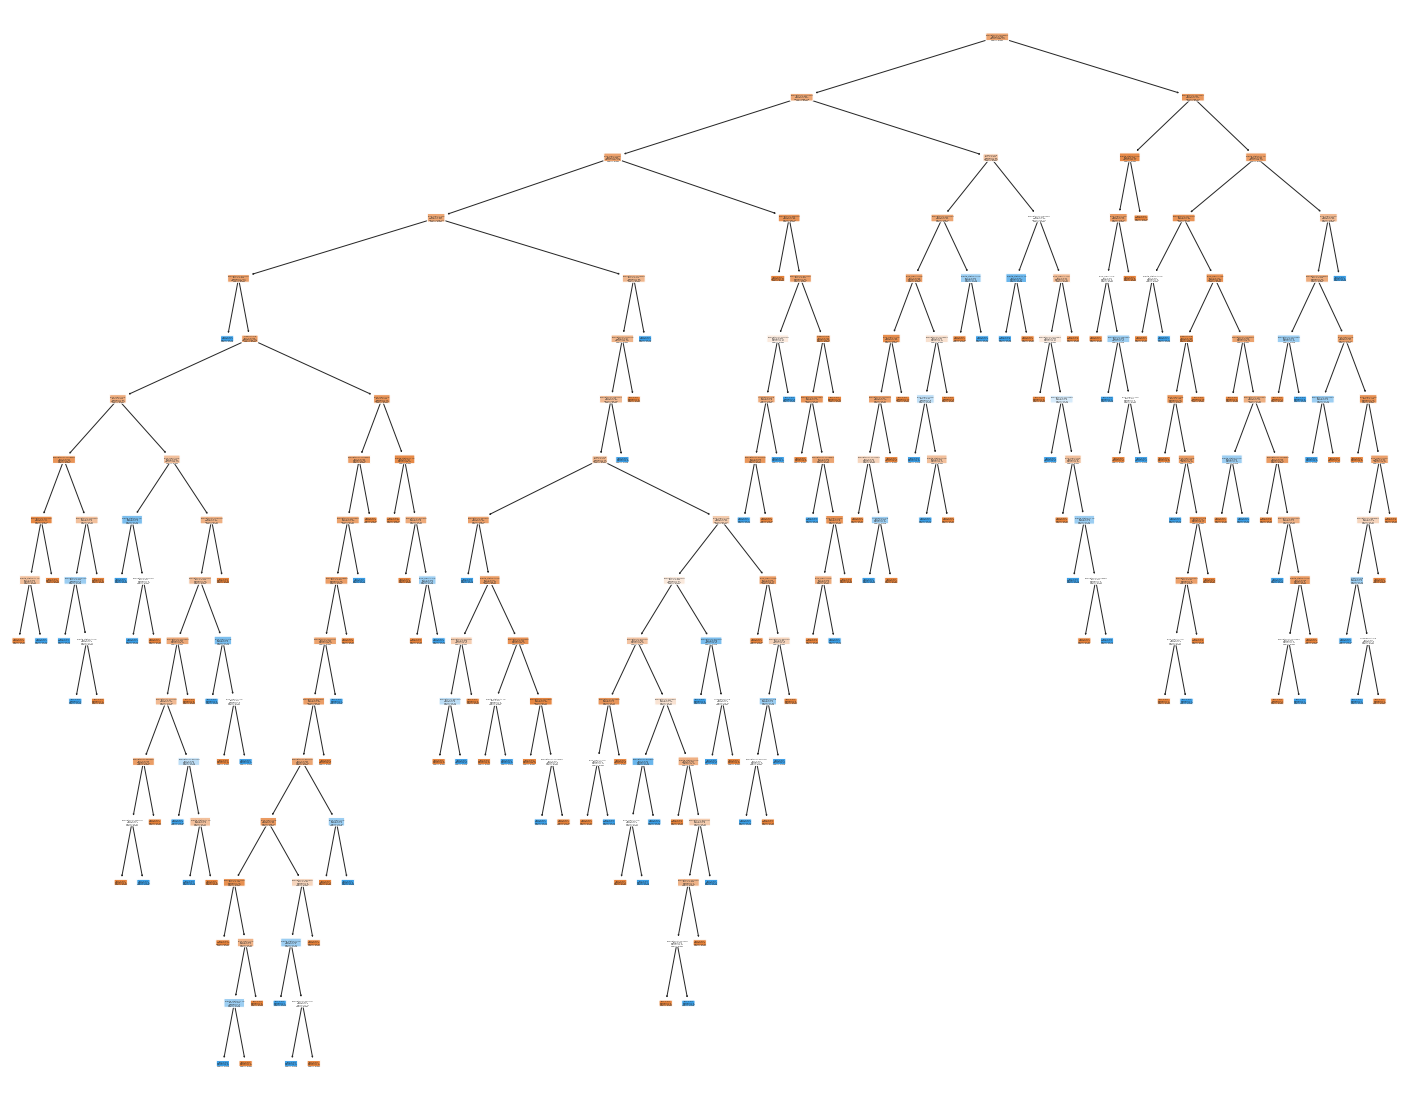

In [13]:
from sklearn.tree import plot_tree
plt.figure(figsize = (25,20))
plot_tree(tree, filled = True, rounded = True, class_names = ['Risky', 'Good'], feature_names = X.columns)
plt.show()

# Pruning using cost complexity pruning

In [14]:
pruning = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = pruning.ccp_alphas[:-1]
trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state = 42 , ccp_alpha = ccp_alpha, criterion ='gini')
    tree.fit(X_train, y_train)
    trees.append(tree)
ccp_alphas

array([0.        , 0.00133333, 0.00146947, 0.00148148, 0.00148148,
       0.00148148, 0.00148148, 0.00148148, 0.00148148, 0.00164103,
       0.00164609, 0.00166667, 0.00166667, 0.00177778, 0.00185185,
       0.00190476, 0.00191571, 0.00192342, 0.0020202 , 0.0020915 ,
       0.00212121, 0.0021893 , 0.00222222, 0.00222412, 0.00234048,
       0.00242424, 0.00253968, 0.00266667, 0.00269095, 0.00278689,
       0.00295077, 0.00295284, 0.00295738, 0.00296296, 0.00306318,
       0.00309764, 0.00315657, 0.00328634, 0.00333333, 0.0037397 ])

In [15]:
train_scores = [tree.score(X_train, y_train) for tree in trees]
test_scores = [tree.score(X_test, y_test) for tree in trees]

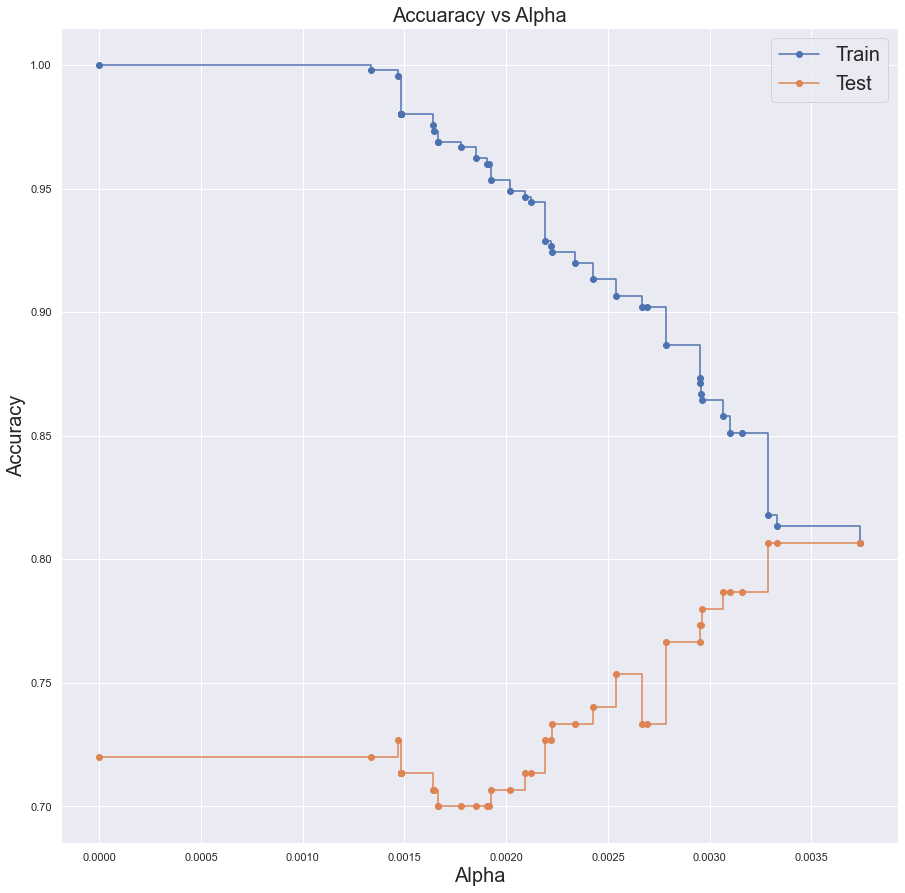

In [16]:
fig, ax = plt.subplots(figsize = (15,15))
ax.set_xlabel('Alpha', fontsize = 20)
ax.set_ylabel('Accuracy', fontsize = 20)
ax.set_title('Accuaracy vs Alpha', fontsize = 20)
ax.plot(ccp_alphas, train_scores, drawstyle = 'steps-post', marker = 'o', label = 'Train' )
ax.plot(ccp_alphas, test_scores, drawstyle = 'steps-post', marker = 'o', label = 'Test')
ax.legend(fontsize = 20)
plt.show()

# K-fold to determine best value of alpha# 

In [17]:
kfold = KFold(10)
alpha_values = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state = 42 , ccp_alpha = ccp_alpha, criterion = 'gini')
    scores = cross_val_score(tree, X_train, y_train, cv = kfold)
    alpha_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_values, columns = ['alpha', 'mean_accuracy', 'std'])
alpha_results

,alpha,mean_accuracy,std
0,0.000000,0.635556,0.075817
1,0.001333,0.635556,0.075817
2,0.001469,0.635556,0.075817
3,0.001481,0.635556,0.075817
4,0.001481,0.635556,0.075817
5,0.001481,0.635556,0.075817
6,0.001481,0.635556,0.075817
7,0.001481,0.635556,0.075817
8,0.001481,0.635556,0.075817
9,0.001641,0.644444,0.080737


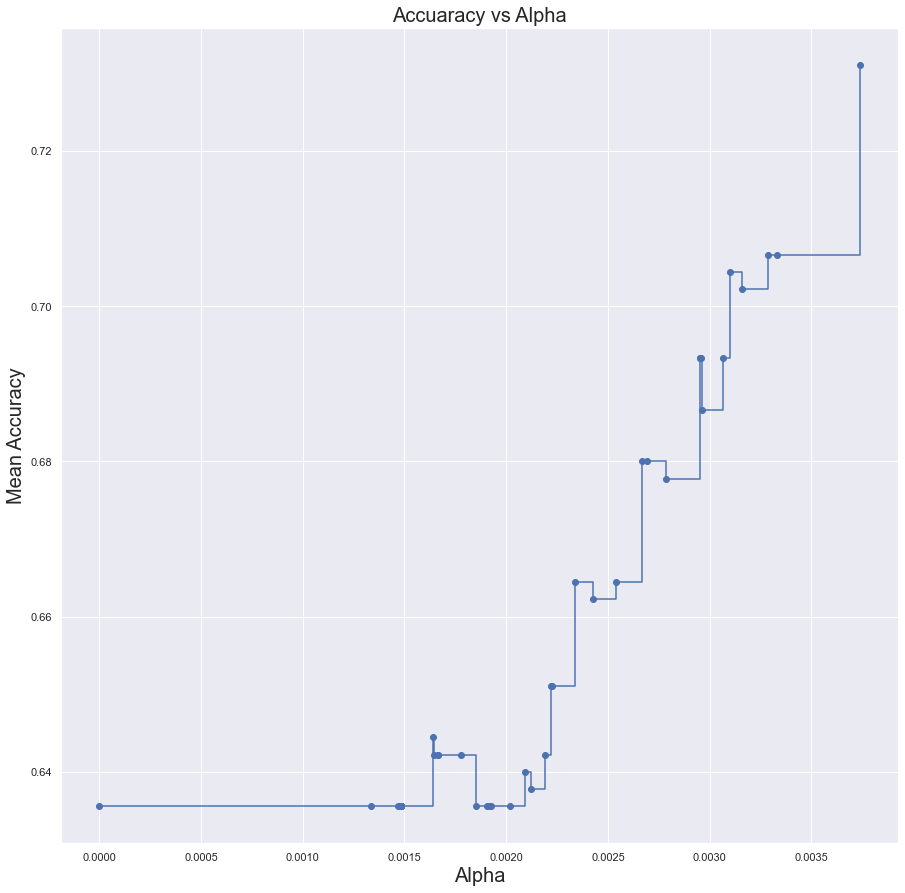

In [18]:
fig, ax = plt.subplots(figsize = (15,15))
ax.set_xlabel('Alpha', fontsize = 20)
ax.set_ylabel('Mean Accuracy', fontsize = 20)
ax.set_title('Accuaracy vs Alpha', fontsize = 20)
ax.plot(ccp_alphas, alpha_results['mean_accuracy'], drawstyle = 'steps-post', marker = 'o')
plt.show()

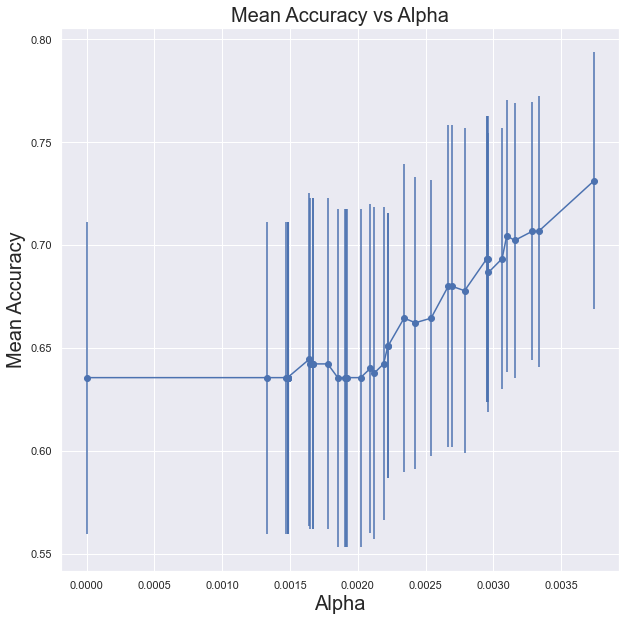

In [19]:
plt.figure(figsize = (10,10))
plt.errorbar(x = alpha_results['alpha'], y = alpha_results['mean_accuracy'], yerr = alpha_results['std'], marker = 'o')
plt.xlabel('Alpha', fontsize = 20)
plt.ylabel('Mean Accuracy', fontsize = 20)
plt.title('Mean Accuracy vs Alpha', fontsize = 20)
plt.show()

In [20]:
alpha_ideal =  float(ccp_alphas[-1:])
alpha_ideal

0.0037396991698067095

# Pruned Decision Tree

In [21]:
tree_pruned = DecisionTreeClassifier(random_state = 42, criterion = 'gini', ccp_alpha = alpha_ideal)
tree_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0037396991698067095, random_state=42)

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [22]:
predictions = tree_pruned.predict(X_test)
pred_df = pd.DataFrame()
pred_df['Actual'] = y_test
pred_df['Predictions'] = predictions
pred_df

,Actual,Predictions
431,Good,Good
372,Good,Good
308,Good,Good
287,Good,Good
293,Good,Good
...,...,...
242,Good,Good
66,Good,Good
26,Good,Good
353,Good,Good


In [23]:
np.mean(predictions == y_test)

0.8066666666666666

In [24]:
cf_mat = confusion_matrix(y_test, predictions)
cf_mat

array([[120,   1],
       [ 28,   1]], dtype=int64)

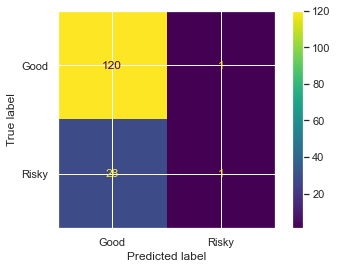

In [25]:
plot_confusion_matrix(tree_pruned, X_test, y_test)

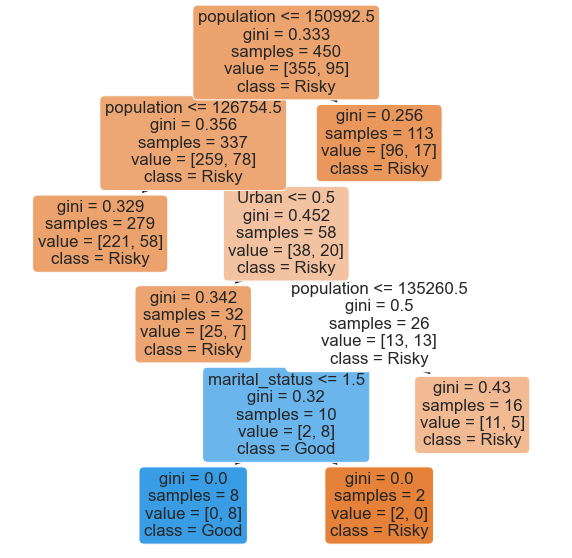

In [26]:
plt.figure(figsize = (10,10))
plot_tree(tree_pruned, filled = True, rounded = True, class_names = ['Risky', 'Good'], feature_names = X.columns)
plt.show()